<a href="https://colab.research.google.com/github/Alixandrini/ENGJ22/blob/main/Aula%201/Aula_1_PIL_Tutorial_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biblioteca de Imagem Python - PIL

A classe mais importante na Python Imaging Library é a classe Image, definida no módulo com o mesmo nome. Você pode criar instâncias dessa classe de várias maneiras; seja carregando imagens de arquivos, processando outras imagens ou criando imagens do zero.

Para carregar uma imagem de um arquivo, use a função open() no módulo Image:

In [7]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [15]:
from PIL import Image

im = Image.open('My Drive/Colab Notebooks/ENGJ33/area1.tif')

Se for bem-sucedida, essa função retornará um objeto Image. Agora você pode usar atributos de instância para examinar o conteúdo do arquivo:

In [17]:
print(im.format, im.size, im.mode)

TIFF (2304, 1856) RGB


O atributo format identifica a origem de uma imagem. Se a imagem não foi lida de um arquivo, ela é definida como Nenhuma. O atributo size é uma tupla com 2 tuplas contendo largura e altura (em pixels). O atributo mode define o número e os nomes das bandas na imagem, e também o tipo e a profundidade do pixel. Os modos comuns são “L” (luminância) para imagens em tons de cinza, “RGB” para imagens de cores reais e “CMYK” para imagens de pré-impressão.

Se o arquivo não puder ser aberto, uma exceção OSError é gerada.

Depois de ter uma instância da classe Image, você pode usar os métodos definidos por essa classe para processar e manipular a imagem. Por exemplo, vamos exibir a imagem que acabamos de carregar:



In [20]:
im.show()

A versão padrão do show() não é muito eficiente, pois salva a imagem em um arquivo temporário e chama um utilitário para exibir a imagem. Se você não tiver um utilitário apropriado instalado, ele nem funcionará. Quando funciona, porém, é muito útil para depuração e testes.

Pra mim não funcionou no Google Colab, outra função que pode nos ajudar é a exebição do pyplot, mas para isso precisamos chamar essa função em uma outra bilbioteca a matplotlib.






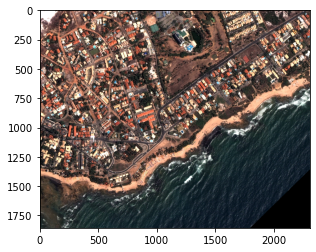

In [22]:
from matplotlib import pyplot
pyplot.imshow(im)
pyplot.show()

##Cortar, colar e mesclar imagens

A classe Image contém métodos que permitem manipular regiões dentro de uma imagem. Para extrair um sub-retângulo de uma imagem, use o método crop().
###Copiando um subretângulo de uma imagem

In [38]:
box = (100, 100, 400, 400)
region = im.crop(box)


A região é definida por uma tupla de 4, onde as coordenadas são (esquerda, superior, direita, inferior). A Python Imaging Library usa um sistema de coordenadas com (0, 0) no canto superior esquerdo. Observe também que as coordenadas se referem a posições entre os pixels, portanto, a região no exemplo acima é exatamente 300x300 pixels.
A região agora pode ser processada de uma certa maneira e colada de volta.
###Processando um subretângulo e colando-o de volta

In [40]:
region = region.transpose(Image.ROTATE_180)
im.paste(region, box)


Ao colar regiões de volta, o tamanho da região deve corresponder exatamente à região especificada. Além disso, a região não pode se estender para fora da imagem. No entanto, os modos da imagem original e a região não precisam corresponder. Caso contrário, a região é convertida automaticamente antes de ser colada (consulte a seção Transformações de cores abaixo para obter detalhes).

Aqui está um exemplo adicional:
###Rolando uma imagem



In [26]:
def roll(im, delta):
    """Roll an image sideways."""
    xsize, ysize = im.size

    delta = delta % xsize
    if delta == 0:
        return im

    part1 = im.crop((0, 0, delta, ysize))
    part2 = im.crop((delta, 0, xsize, ysize))
    im.paste(part1, (xsize - delta, 0, xsize, ysize))
    im.paste(part2, (0, 0, xsize - delta, ysize))

    return im

Ou se você quiser mesclar duas imagens em uma imagem mais ampla:
###Mesclando imagens

In [27]:
def merge(im1, im2):
    w = im1.size[0] + im2.size[0]
    h = max(im1.size[1], im2.size[1])
    im = Image.new("RGBA", (w, h))

    im.paste(im1)
    im.paste(im2, (im1.size[0], 0))

    return im

Para truques mais avançados, o método paste também pode usar uma máscara de transparência como argumento opcional. Nessa máscara, o valor 255 indica que a imagem colada está opaca nessa posição (ou seja, a imagem colada deve ser usada como está). O valor 0 significa que a imagem colada é completamente transparente. Os valores intermediários indicam diferentes níveis de transparência. Por exemplo, colar uma imagem RGBA e também usá-la como máscara colaria a parte opaca da imagem, mas não o fundo transparente.

A Python Imaging Library também permite que você trabalhe com as bandas individuais de uma imagem multibanda, como uma imagem RGB. O método split cria um conjunto de novas imagens, cada uma contendo uma banda da imagem multibanda original. A função de mesclagem pega um modo e uma tupla de imagens e as combina em uma nova imagem. A amostra a seguir troca as três bandas de uma imagem RGB:
###Divisão e fusão de bandas

In [28]:
r, g, b = im.split()
im = Image.merge("RGB", (b, g, r))

Observe que para uma imagem de banda única, split() retorna a própria imagem. Para trabalhar com faixas de cores individuais, você pode converter a imagem para “RGB” primeiro.
##Transformações geométricas

A classe PIL.Image.Image contém métodos para redimensionar() e girar() uma imagem. O primeiro pega uma tupla dando o novo tamanho, o último o ângulo em graus no sentido anti-horário.
###Transformações de geometria simples



In [44]:
out = im.resize((128, 128))
out = im.rotate(45) # degrees counter-clockwise

Para girar a imagem em etapas de 90 graus, você pode usar o método rotate() ou o método transpose(). Este último também pode ser usado para virar uma imagem em torno de seu eixo horizontal ou vertical.
###Transpondo uma imagem

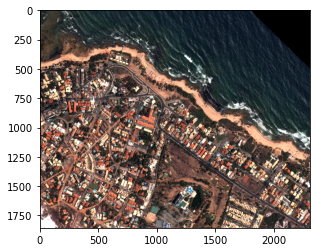

In [46]:
out = im.transpose(Image.FLIP_LEFT_RIGHT)
out = im.transpose(Image.FLIP_TOP_BOTTOM)


As operações de transpose(ROTATE) também podem ser executadas de forma idêntica às operações de rotate(), desde que o sinalizador de expansão seja verdadeiro, para fornecer as mesmas alterações no tamanho da imagem.

Uma forma mais geral de transformações de imagem pode ser realizada através do método transform().

##Realce de imagem

A Python Imaging Library fornece vários métodos e módulos que podem ser usados ​​para aprimorar imagens.
Filtros

O módulo ImageFilter contém vários filtros de aprimoramento predefinidos que podem ser usados ​​com o método filter().
###Aplicando filtros


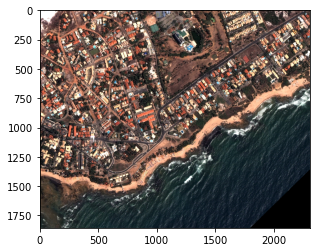

In [47]:
from PIL import ImageFilter
out = im.filter(ImageFilter.DETAIL)


###Operações de ponto

O método point() pode ser usado para traduzir os valores de pixel de uma imagem (por exemplo, manipulação de contraste da imagem). Na maioria dos casos, um objeto de função esperando um argumento pode ser passado para este método. Cada pixel é processado de acordo com essa função:
Aplicando transformações de ponto



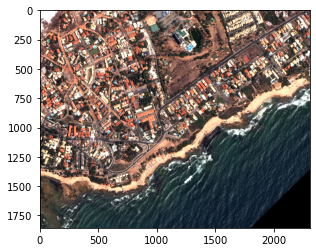

In [48]:
# multiply each pixel by 1.2
out = im.point(lambda i: i * 1.2)


Usando a técnica acima, você pode aplicar rapidamente qualquer expressão simples a uma imagem. Você também pode combinar os métodos point() e paste() para modificar seletivamente uma imagem:
### Processando bandas individuais

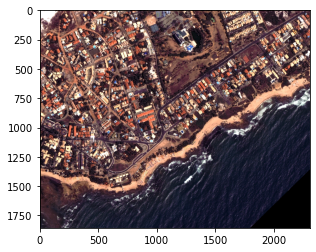

In [49]:
# split the image into individual bands
source = im.split()

R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = source[R].point(lambda i: i < 100 and 255)

# process the green band
out = source[G].point(lambda i: i * 0.7)

# paste the processed band back, but only where red was < 100
source[G].paste(out, None, mask)

# build a new multiband image
im = Image.merge(im.mode, source)
